In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
data = pd.read_fwf("brain_body.txt")

In [141]:
print(data.shape)
data.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [142]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [143]:
data.Brain.quantile(0.75)

48.2025

In [144]:
data.Body.quantile(0.75)

166.0

In [145]:
iqr = data.Brain.quantile(0.75) - data.Brain.quantile(0.25)
upper_thresold = data.Brain.quantile(0.75) + (1.5 * iqr)
lower_thresold = data.Brain.quantile(0.25) - (1.5 * iqr)
lower_thresold, upper_thresold

(-70.80375000000001, 119.60625)

In [146]:
iqr = data.Body.quantile(0.75) - data.Body.quantile(0.25)
upper_thresold = data.Body.quantile(0.75) + (1.5 * iqr)
lower_thresold = data.Body.quantile(0.25) + (1.5 * iqr)
lower_thresold, upper_thresold

(246.875, 408.625)

In [147]:
data.isnull().sum()

Brain    0
Body     0
dtype: int64

In [148]:
data = data.drop_duplicates()

In [149]:
data.dtypes

Brain    float64
Body     float64
dtype: object

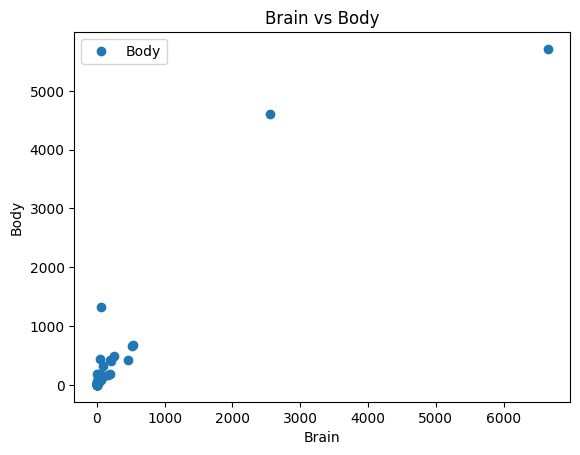

In [150]:
data.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [162]:
data.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [152]:
data

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [153]:
data.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 4.650e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       2.547e+03, 2.300e-02, 1.871e+02, 5.210e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 5.290e+02, 2.070e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 6.654e+03, 3.500e+00, 6.800e+00, 3.500e+01,
       4.050e+00, 1.200e-01, 2.300e-02, 1.000e-02, 1.400e+00, 2.500e+02,
       2.500e+00, 5.550e+01, 1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01,
       6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01,
       4.800e-02, 1.920e+02, 3.000e+00, 1.600e+02, 9.000e-01, 1.620e+00,
       1.040e-01, 4.235e+00])

In [154]:
X = data.loc[:, ['Brain']].values
y = data.loc[:, 'Body'].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [155]:
y_test

array([1.195e+02, 4.603e+03, 4.000e+00, 4.400e+02, 6.400e+00, 4.230e+02,
       1.550e+01, 3.250e+02, 6.300e+00, 9.820e+01, 1.230e+01, 5.500e+00,
       1.570e+02, 2.100e+01, 4.900e+02, 1.000e+00])

In [156]:
X_train.shape, X_test.shape

((46, 1), (16, 1))

In [157]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [158]:
print(regressor.intercept_)
print(regressor.coef_)

72.6780566021082
[0.85376664]


In [159]:
y_pred = regressor.predict(X_test)
"Syntax : varName.predict(test_features)"
y_pred

array([ 103.69539872, 2247.22169442,   72.76428703,  117.21052466,
         73.04090743,  469.67954525,   73.08786459,  145.24822119,
         74.12945989,   85.33941591,   74.38558989,   73.56597391,
        158.05472083,   75.75161651,  286.11971717,   72.7805086 ])

In [160]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,119.5,103.695399
1,4603.0,2247.221694
2,4.0,72.764287
3,440.0,117.210525
4,6.4,73.040907
5,423.0,469.679545
6,15.5,73.087865
7,325.0,145.248221
8,6.3,74.129460
9,98.2,85.339416


In [161]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) 

R2- SCORE: 0.698634103057657


0.698634103057657